## Business Statement

In recent years, City Hotel and Resort Hotel have experienced high cancellation rates. As a result, both hotels face challenges such as reduced revenue and suboptimal room occupancy. Therefore, reducing cancellation rates has become their primary goal to improve revenue generation. Our aim is to provide comprehensive business advice to help address this issue.

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [2]:
df=pd.read_csv("hotel_bookings 2.csv")

## Exploratory Data Analysis and Data Cleaning

In [3]:
# first five rows

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
# last five rows

df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [5]:
# no. of rows and columns

print("No. of rows are:",df.shape[0])
print("No. of columns are:",df.shape[1])

No. of rows are: 119390
No. of columns are: 32


In [6]:
# Each column name

df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
# Datatype and null value in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

There are null values in children,country,agent and company columns.So, we need to do the null value treatment of it. Also reservation_status_date column is an important variable for our analysis. Hence we will change its datatype from object to date


In [8]:
# Convert "reservation_status_date" column datatype from object to date

df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"],dayfirst=True)

In [9]:
df["reservation_status_date"].dtype

dtype('<M8[ns]')

In [10]:
# How many unique values are in categorical columns
df.select_dtypes(include="object").nunique()

hotel                     2
arrival_date_month       12
meal                      5
country                 177
market_segment            8
distribution_channel      5
reserved_room_type       10
assigned_room_type       12
deposit_type              3
customer_type             4
reservation_status        3
dtype: int64

In [11]:
# What are the unique values in each categorical columns

for i in df.select_dtypes(include="object"):
    print(i)
    print(df[i].unique())
    print("-"*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [12]:
# How many null values are in each column

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We will drop agent and company columns because agent column is not required for our analysis and the null values of company column is so huge that we can't handle it.Moreover, we will drop null values of country and children columns because out of 1,00,000+ row data they have only 488 and 4 null values respectively and removing them won't impact the data 

In [13]:
## Remove agent and company columns from the data

df.drop(columns=["agent","company"],inplace=True)

In [14]:
## Drop null values of children and country columns

df.dropna(subset=["children","country"],inplace=True)

In [15]:
# Let's check again whether data has any null values

df.isnull().sum().sum()

0

In [16]:
# Summary statistics of numerical columns

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


"adr" column stands for average daily rate of hotel and it is important column for our analysis.The above statistics stating there can be outlier in this column. Hence we check for the outlier in this column and try to remove it if find any.

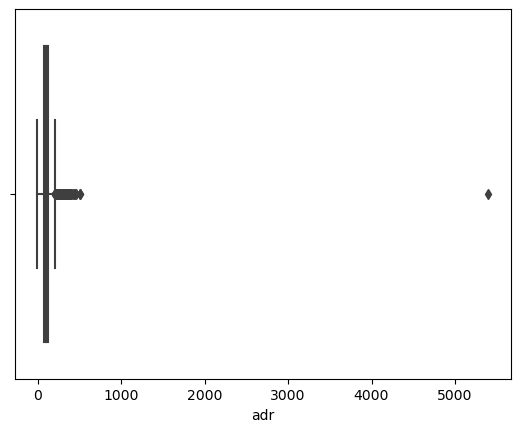

In [17]:
# Visual representation of outliers in adr column
sns.boxplot(data=df,x="adr")
plt.show()

From the above graph we can see that all the values in adr column are less than 1000 whereas there is one value which is higher than 5000. Hence we will remove that value

In [18]:
# Highest Value in "adr" column 
df.sort_values(by="adr",ascending=False)["adr"].head()

48515     5400.0
111403     510.0
15083      508.0
103912     451.5
13142      450.0
Name: adr, dtype: float64

As I have extracted top 5 values in adr column. We can see that 5400 is that one value which is extreme high than others. So, we will remove it.

In [19]:
df=df[df["adr"]<5400]

## Data Analysis and Visualizations

In [24]:
# What percentage of reservations are cancelled and non-cancelled

(df["is_canceled"].value_counts()/df.shape[0])*100

is_canceled
0    62.865337
1    37.134663
Name: count, dtype: float64

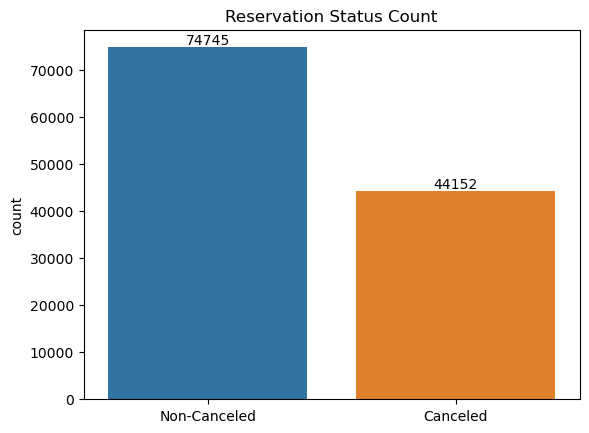

In [38]:
ax=sns.countplot(data=df,x="is_canceled")
plt.bar_label(ax.containers[0])
plt.title("Reservation Status Count")
plt.xticks([0,1],["Non-Canceled","Canceled"])
plt.xlabel("")
plt.show()

62.82% hotel reservations are non-cancelled and 37.13% of hotel reservations are cancelled

In [67]:
# What is the cancellation and non-cancellation status of  Resort hotel and City hotel

print("Reservation status of Resort Hotel")
print()
x=df[df["hotel"]=="Resort Hotel"]
print((x["is_canceled"].value_counts()/x.shape[0])*100)
print("-"*50)
print("Reservation status of City Hotel")
y=df[df["hotel"]=="City Hotel"]
(y["is_canceled"].value_counts()/y.shape[0])*100

Reservation status of Resort Hotel

is_canceled
0    72.024952
1    27.975048
Name: count, dtype: float64
--------------------------------------------------
Reservation status of City Hotel


is_canceled
0    58.291825
1    41.708175
Name: count, dtype: float64

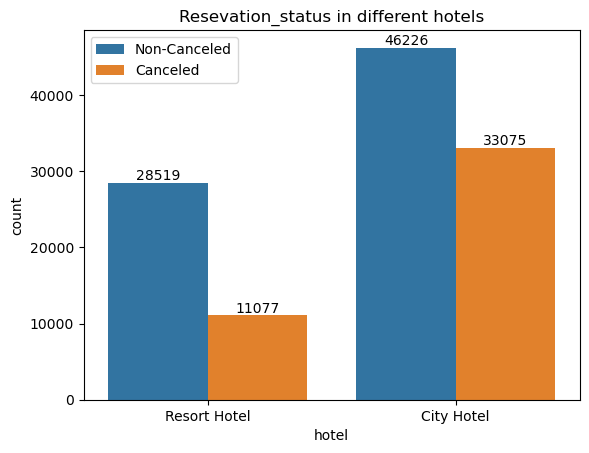

In [61]:
ax=sns.countplot(data=df,x="hotel",hue='is_canceled')
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.title("Resevation_status in different hotels")
plt.legend(["Non-Canceled","Canceled"])
plt.show()

The reservation status of city hotel is more concerning than Resort hotel because in city hotel 41.70% of reservation are cancelled which is very diffcult to handle.

In [ ]:
# In which month most of the hotel reservation or cancellation occurs

In [69]:
import datetime as dt
df["reservation_status_month"]=df["reservation_status_date"].dt.month

In [82]:
print("Highest reservation month")
print()
x=df[df["is_canceled"]==0]
print(x["reservation_status_month"].value_counts())
print("-"*50)
y=df[df["is_canceled"]==1]
print("Highest cancellation month")
y["reservation_status_month"].value_counts()

Highest reservation month

reservation_status_month
8     8539
7     7714
5     7156
10    6954
9     6701
4     6493
3     6359
6     6354
2     5084
11    4994
1     4562
12    3835
Name: count, dtype: int64
--------------------------------------------------
Highest cancellation month


reservation_status_month
1     6060
7     4360
2     4351
10    4141
3     3818
12    3519
4     3464
5     3138
11    3058
6     2901
8     2684
9     2658
Name: count, dtype: int64

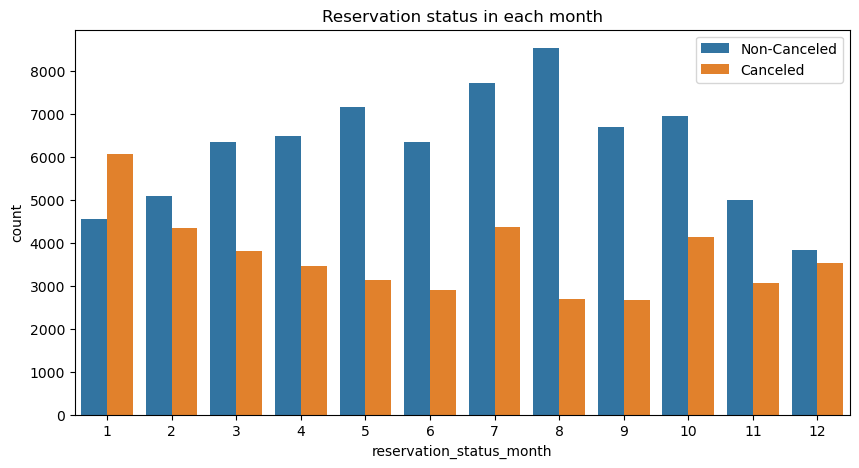

In [84]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="reservation_status_month",hue="is_canceled")
plt.title("Reservation status in each month")
plt.legend(["Non-Canceled","Canceled"])
plt.show()

The maximum booking occur in august and minimum booking occur in december.Moreover,maximum cancellation occurs in january and mimimum cancellation occur in september.

In [94]:
# Average daily rate (ADR) in each month during cancellation

x=df[df["is_canceled"]==1]

x.groupby(["reservation_status_month"])["adr"].sum()

reservation_status_month
1     571203.57
2     447675.76
3     424872.56
4     425315.23
5     391438.08
6     359003.34
7     481376.17
8     325668.43
9     274176.33
10    330968.87
11    281367.90
12    319272.65
Name: adr, dtype: float64

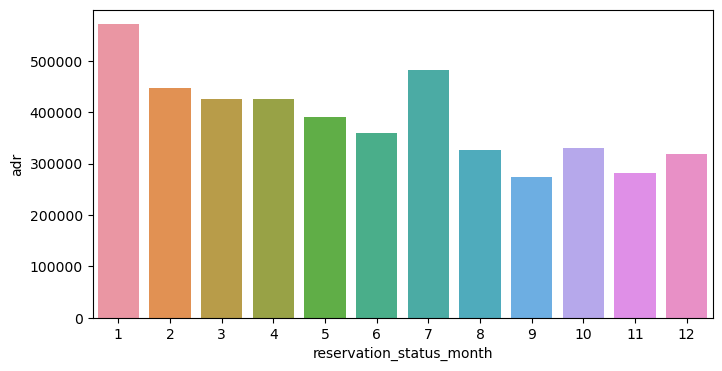

In [98]:
plt.figure(figsize=(8,4))
sns.barplot(data=x,x="reservation_status_month",y="adr",errorbar=('ci',False),estimator="sum")
plt.show()

As we can see the price is lower in september and earlier we see that lowest cancellation happened in september.Also, price is higher in January and eariler we saw maximum cancellation happened in January.Hence it proves Price plays important factor in cancelling the booking.

In [124]:
# What are top 10 countries where hotel cancellation is highest

x=df[df["is_canceled"]==1]

x["country"].value_counts().head(10)

country
PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: count, dtype: int64

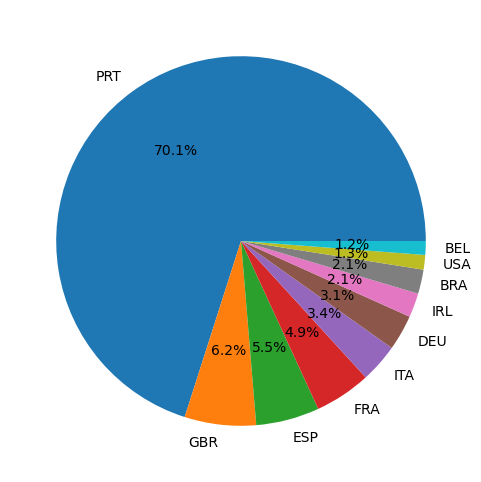

In [125]:
plt.figure(figsize=(6,6))
plt.pie(x["country"].value_counts().head(10),autopct="%1.1f%%",labels=x["country"].value_counts().head(10).index)
plt.show()

As we can see compare to other countries, Portugal has highest cancellation rate of round 70.07%. Hence, we can give them suggestion to improve their hotel facilities,optimise their hotel prices,do vigorous advertisemt,offer special discount to attract more customers.

In [118]:
# From which source the maxmium customers are coming for hotel booking

(df["market_segment"].value_counts()/df.shape[0])*100

market_segment
Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: count, dtype: float64

47.43% of their customers are coming from online Travel Agent

In [122]:
# Majority of Customers who cancelled their bookings coming from which sources

x=df[df["is_canceled"]==1]
(x["market_segment"].value_counts()/x.shape[0])*100

market_segment
Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: count, dtype: float64

As we know majority of customers are coming from online travel agent. However, This customer segment are also top in cancelling the maximum booking.
There can be many reasons behind them like- online photos of hotel is not matching with the real view of hotel or facilities that are mentioned online are not up to the mark in reality.

## Final Suggestions for Resort hotel and City hotel to reduce their cancellation booking percentage

1. Cancellation rates tend to increase as prices go up. To prevent reservation cancellations, hotels should consider adjusting their pricing strategies by lowering rates for specific locations. Offering discounts to customers can also help.

2. The ratio of cancellations to bookings is higher for resort hotels than city hotels. Therefore, resort hotels should consider offering reasonable discounts on room prices during weekends or holidays.

3. In January, hotels can launch marketing campaigns or promotions to attract more customers.

4. Hotels can also reduce cancellation rates by improving the quality of their accommodations and services, especially in Portugal.